In [7]:
# ! pip install googlemaps

In [1]:
import pandas as pd
import numpy as np
import folium
import googlemaps as gmaps

In [3]:
seoul = pd.read_csv("../서울특별시 대규모점포 인허가 정보.csv", encoding = 'euc-kr')
seoul = seoul[['영업상태명', '지번주소', '사업장명', '좌표정보(X)', '좌표정보(Y)']]
seoul = seoul[seoul['영업상태명'] == '영업/정상']
seoul = seoul.dropna(axis=0)
seoul.head()

,영업상태명,지번주소,사업장명,좌표정보(X),좌표정보(Y)
0,영업/정상,서울특별시 종로구 낙원동 288번지 낙원상가,낙원상가,198838.912966,452214.210962
1,영업/정상,서울특별시 종로구 낙원동 288번지 낙원상가,낙원상가,198838.912966,452214.210962
2,영업/정상,서울특별시 종로구 예지동 6번지 1호,광장주식회사,199837.414267,451974.128468
3,영업/정상,서울특별시 성동구 성수동1가 656-1208 성수만세주유소,홈플러스익스프레스 뚝섬2점,203841.225548,449475.540141
4,영업/정상,서울특별시 종로구 서린동 33호,영풍문고,198351.818737,451921.603026


In [4]:
from pyproj import Proj, transform

In [5]:
# Projection 정의
# 중부원점(Bessel): 서울 등 중부지역 EPSG:2097
proj_1 = Proj(init='epsg:2097')

# WGS84 경위도: GPS가 사용하는 좌표계 EPSG:4326
proj_2 = Proj(init='epsg:4326')

/home/hadoop/.local/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/hadoop/.local/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [6]:
# 데이터 프레임 지정
DataFrame = seoul.copy()

x_list = []
y_list = []

for idx, row in DataFrame.iterrows():
    x, y = row['좌표정보(X)'], row['좌표정보(Y)']
    x_, y_ = transform(proj_1, proj_2, x, y)
    x_list.append(x_)
    y_list.append(y_)
    
seoul['lon'] = x_list
seoul['lat'] = y_list

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  if __name__ == '__main__':


In [7]:
seoul['구'] = seoul.지번주소.str.split(' ').str[1]
seoul

,영업상태명,지번주소,사업장명,좌표정보(X),좌표정보(Y),lon,lat,구
0,영업/정상,서울특별시 종로구 낙원동 288번지 낙원상가,낙원상가,198838.912966,452214.210962,126.984755,37.572217,종로구
1,영업/정상,서울특별시 종로구 낙원동 288번지 낙원상가,낙원상가,198838.912966,452214.210962,126.984755,37.572217,종로구
2,영업/정상,서울특별시 종로구 예지동 6번지 1호,광장주식회사,199837.414267,451974.128468,126.996057,37.570055,종로구
3,영업/정상,서울특별시 성동구 성수동1가 656-1208 성수만세주유소,홈플러스익스프레스 뚝섬2점,203841.225548,449475.540141,127.041366,37.547535,성동구
4,영업/정상,서울특별시 종로구 서린동 33호,영풍문고,198351.818737,451921.603026,126.979241,37.569580,종로구
...,...,...,...,...,...,...,...,...
937,영업/정상,서울특별시 양천구 신정3동 1183번지 12호,홈플러스(주)익스프레스 신정점,186934.147693,446336.680482,126.850101,37.519168,양천구
938,영업/정상,서울특별시 중랑구 면목3.8동 499번지 4호,홈플러스(주)익스프레스 면목점,207708.364766,453525.741162,127.085168,37.584003,중랑구
939,영업/정상,서울특별시 중랑구 면목동 168번지 2호,홈플러스(주)면목점,207089.216591,453074.476764,127.078154,37.579942,중랑구
940,영업/정상,서울특별시 중랑구 신내2동 645번지,홈플러스 신내점,208208.786685,457054.793656,127.090873,37.615795,중랑구


In [8]:
seoul = seoul[['구', '사업장명', 'lat', 'lon']]
seoul

,구,사업장명,lat,lon
0,종로구,낙원상가,37.572217,126.984755
1,종로구,낙원상가,37.572217,126.984755
2,종로구,광장주식회사,37.570055,126.996057
3,성동구,홈플러스익스프레스 뚝섬2점,37.547535,127.041366
4,종로구,영풍문고,37.569580,126.979241
...,...,...,...,...
937,양천구,홈플러스(주)익스프레스 신정점,37.519168,126.850101
938,중랑구,홈플러스(주)익스프레스 면목점,37.584003,127.085168
939,중랑구,홈플러스(주)면목점,37.579942,127.078154
940,중랑구,홈플러스 신내점,37.615795,127.090873


In [9]:
seoul.rename(columns={'lat':'위도', 'lon':'경도'}, inplace=True)
store = seoul
store.to_csv("df_store.csv")
store

/home/hadoop/.local/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,구,사업장명,위도,경도
0,종로구,낙원상가,37.572217,126.984755
1,종로구,낙원상가,37.572217,126.984755
2,종로구,광장주식회사,37.570055,126.996057
3,성동구,홈플러스익스프레스 뚝섬2점,37.547535,127.041366
4,종로구,영풍문고,37.569580,126.979241
...,...,...,...,...
937,양천구,홈플러스(주)익스프레스 신정점,37.519168,126.850101
938,중랑구,홈플러스(주)익스프레스 면목점,37.584003,127.085168
939,중랑구,홈플러스(주)면목점,37.579942,127.078154
940,중랑구,홈플러스 신내점,37.615795,127.090873


In [10]:
groups = store.groupby('구')
groups.size()

구
강남구     36
강동구     23
강북구     19
강서구     25
관악구     20
광진구     26
구로구     27
금천구     21
노원구     18
도봉구     15
동대문구    30
동작구     15
마포구     24
서대문구    12
서초구     12
성동구     21
성북구     30
송파구     36
양천구     21
영등포구    25
용산구     22
은평구     22
종로구     17
중구      32
중랑구     13
dtype: int64

In [11]:
gu_store = pd.DataFrame({'구':['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'],
                         '편의시설 갯수':[36, 23, 19, 25, 20, 26, 27, 21, 18, 15, 30, 15, 24, 12, 12, 21, 30, 36, 21, 25, 22, 22, 17, 32, 13]})
gu_store.to_csv("df_gu_store.csv")
gu_store

,구,편의시설 갯수
0,강남구,36
1,강동구,23
2,강북구,19
3,강서구,25
4,관악구,20
5,광진구,26
6,구로구,27
7,금천구,21
8,노원구,18
9,도봉구,15


In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl

In [13]:
# deprecate 관련 경고는 무시하도록 설정
import warnings
warnings.filterwarnings('ignore')

In [14]:
# mpl.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')    # 설치된 폰트 확인

In [15]:
fontpath = '/usr/share/fonts/NanumGothic.ttf'

mpl.font_manager.FontProperties(fname=fontpath)
# 한글이 안보이면 위 라인을 주석치고 실행했다가
# 다시 주석해제 후 실행

mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

<AxesSubplot:title={'center':'구별 편의시설 갯수'}>

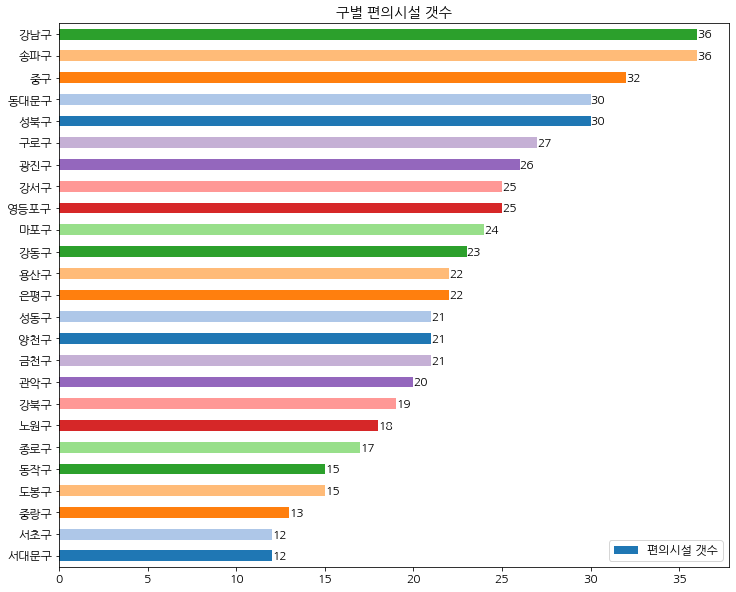

In [16]:
gu_store = gu_store.sort_values(by=['편의시설 갯수'], ascending=True)
ax = gu_store.plot.barh(figsize=(12,10), x='구', y='편의시설 갯수', xlabel='', ylabel='편의시설 갯수', 
                        color=plt.cm.tab20(np.arange(10)), title='구별 편의시설 갯수'
                        )

# annotate(표시할값, x좌표, y좌표, 옵션)
for p in ax.patches: 
    ax.annotate(p.get_width(), (p.get_x()+p.get_width(), p.get_y()+0.05) )
ax

In [19]:
seoul = pd.read_excel("../Report.xls")
seoul = seoul.iloc[2:,]
seoul = seoul.rename(columns={'자치구':'지역'})
seoul

,기간,지역,면적,면적.1,동,동.1,통,반
2,2020,종로구,23.91,3.95,17,87,279,1475
3,2020,중구,9.96,1.65,15,74,253,1580
4,2020,용산구,21.87,3.61,16,36,354,2581
5,2020,성동구,16.86,2.79,17,17,467,3626
6,2020,광진구,17.06,2.82,15,7,363,2999
7,2020,동대문구,14.22,2.35,14,10,360,2633
8,2020,중랑구,18.5,3.06,16,6,550,4165
9,2020,성북구,24.58,4.06,20,39,464,3729
10,2020,강북구,23.6,3.9,13,4,389,3381
11,2020,도봉구,20.65,3.41,14,4,394,2974


In [24]:
gu_store

,구,편의시설 갯수
13,서대문구,12
14,서초구,12
24,중랑구,13
9,도봉구,15
11,동작구,15
22,종로구,17
8,노원구,18
2,강북구,19
4,관악구,20
7,금천구,21


In [40]:
seoul["면적"] = pd.to_numeric(seoul["면적"])

In [41]:
gu_store = gu_store.rename(columns={'구':'지역'})

In [42]:
gu_store

,지역,편의시설 갯수
13,서대문구,12
14,서초구,12
24,중랑구,13
9,도봉구,15
11,동작구,15
22,종로구,17
8,노원구,18
2,강북구,19
4,관악구,20
7,금천구,21


In [43]:
seoul_store = pd.merge(gu_store, seoul, on='지역')
seoul_store = seoul_store[['지역','편의시설 갯수','면적']]
seoul_store

,지역,편의시설 갯수,면적
0,서대문구,12,17.63
1,서초구,12,46.98
2,중랑구,13,18.50
3,도봉구,15,20.65
4,동작구,15,16.35
5,종로구,17,23.91
6,노원구,18,35.44
7,강북구,19,23.60
8,관악구,20,29.57
9,금천구,21,13.02


In [44]:
seoul_store["면적비율"] = seoul_store["편의시설 갯수"] / seoul_store["면적"] * 100
seoul_store

,지역,편의시설 갯수,면적,면적비율
0,서대문구,12,17.63,68.065797
1,서초구,12,46.98,25.542784
2,중랑구,13,18.50,70.270270
3,도봉구,15,20.65,72.639225
4,동작구,15,16.35,91.743119
5,종로구,17,23.91,71.099958
6,노원구,18,35.44,50.790068
7,강북구,19,23.60,80.508475
8,관악구,20,29.57,67.636118
9,금천구,21,13.02,161.290323


In [47]:
seoul_store.rename(columns={'지역':'구', '편의시설 갯수':'편의시설갯수', '면적':'구면적',}, inplace=True)
gu_store = seoul_store
gu_store["면적비율"] = round(gu_store["면적비율"], 2)
gu_store.to_csv("../df_gu_store.csv", index=None)
gu_store

,구,편의시설갯수,구면적,면적비율
0,서대문구,12,17.63,68.07
1,서초구,12,46.98,25.54
2,중랑구,13,18.50,70.27
3,도봉구,15,20.65,72.64
4,동작구,15,16.35,91.74
5,종로구,17,23.91,71.10
6,노원구,18,35.44,50.79
7,강북구,19,23.60,80.51
8,관악구,20,29.57,67.64
9,금천구,21,13.02,161.29


<AxesSubplot:title={'center':'구별 편의시설 면적비율'}>

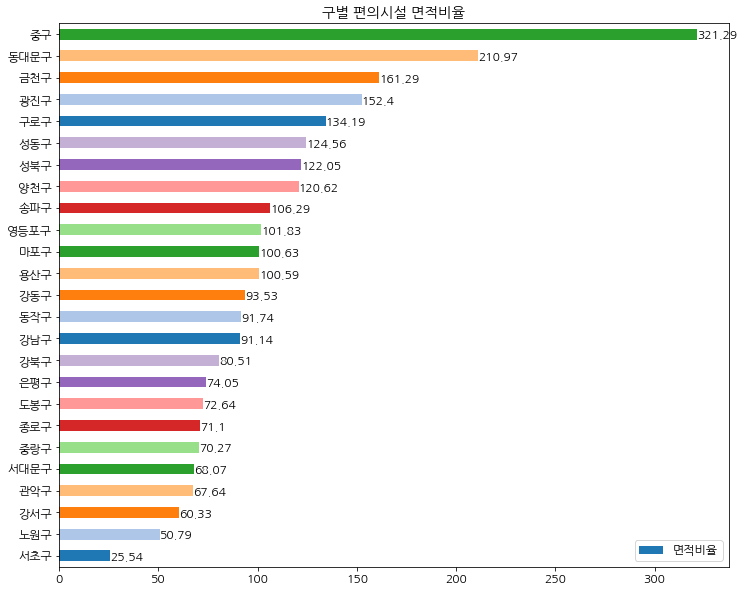

In [49]:
# 구별 공원면적

store = gu_store.sort_values(by=['면적비율'], ascending=True)
ax1 = store.plot.barh(figsize=(12,10), x='구', y='면적비율', xlabel='', ylabel='면적비율', 
                     color=plt.cm.tab20(np.arange(10)), title='구별 편의시설 면적비율'
                     )

# annotate(표시할값, x좌표, y좌표, 옵션)
for p in ax1.patches: 
    ax1.annotate(p.get_width(), (p.get_x()+p.get_width(), p.get_y()+0.05) )
ax1